# Preprocessing
## attribute matrix --> combined attributes

In [1]:
import pandas as pd

dir = "../styleGAN_project_split_data_train_data_attr.csv"
df = pd.read_csv(dir, low_memory = False)

df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [2]:
df=df.replace(-1, 0) 
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [3]:
columns_list=df.columns.values[1:].tolist()
x=df.iloc[0]
x[1:3]

5_o_Clock_Shadow    0
Arched_Eyebrows     1
Name: 0, dtype: object

In [4]:
#https://stackoverflow.com/questions/67277713/concatenate-column-names-by-using-the-binary-values-in-the-columns
#df = df.drop(columns=["combined"])

df['combined'] = df.iloc[:, 1:].dot(df.columns[1:] + ' ').str[:-1]

#def get_combine(x[1:], columns_list):
#    combined = x0 for x[x:]
#    return 
#df['combined'] = df.apply(lambda x: get_combine(df, df.columns), axis=1)

In [5]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,combined
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,Arched_Eyebrows Attractive Brown_Hair Heavy_Ma...
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheek...
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,Big_Lips Blurry Male Narrow_Eyes No_Beard Poin...
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,Attractive No_Beard Pointy_Nose Straight_Hair ...
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,Arched_Eyebrows Attractive Big_Lips Heavy_Make...


In [6]:
df.combined = df.combined.str.replace("_"," ")
#df.head()

In [7]:
df_new = df[["image_id","combined"]]
df_new.sample(5)

,image_id,combined
624,000625.jpg,5 o Clock Shadow Big Nose Black Hair Blurry Bu...
35379,035380.jpg,Blond Hair Heavy Makeup High Cheekbones Mouth ...
156860,156861.jpg,Attractive Bangs Brown Hair Male No Beard Young
54211,054212.jpg,Attractive Bangs Black Hair No Beard Young
150616,150617.jpg,No Beard Young


# vectorizing text

In [8]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
# dataset
ds = df_new["combined"]

# TfidfVectorizer
vec_tfidf = TfidfVectorizer(ngram_range = (1,2))

# vectorize
tfidf_matrix = vec_tfidf.fit_transform(ds)

print('Vocabulary size: {}'.format(len(vec_tfidf.vocabulary_)))
print('Vocabulary content: {}'.format(vec_tfidf.vocabulary_))
# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

Vocabulary size: 449
Vocabulary content: {'arched': 0, 'eyebrows': 144, 'attractive': 2, 'brown': 94, 'hair': 234, 'heavy': 268, 'makeup': 293, 'high': 270, 'cheekbones': 98, 'mouth': 319, 'slightly': 429, 'open': 369, 'no': 342, 'beard': 57, 'pointy': 388, 'nose': 344, 'smiling': 431, 'straight': 436, 'wearing': 442, 'earrings': 141, 'lipstick': 290, 'young': 448, 'arched eyebrows': 1, 'eyebrows attractive': 145, 'attractive brown': 10, 'brown hair': 95, 'hair heavy': 244, 'heavy makeup': 269, 'makeup high': 294, 'high cheekbones': 271, 'cheekbones mouth': 100, 'mouth slightly': 320, 'slightly open': 430, 'open no': 372, 'no beard': 343, 'beard pointy': 60, 'pointy nose': 389, 'nose smiling': 364, 'smiling straight': 432, 'straight hair': 437, 'hair wearing': 255, 'wearing earrings': 443, 'earrings wearing': 142, 'wearing lipstick': 445, 'lipstick young': 292, 'bags': 23, 'under': 438, 'eyes': 179, 'big': 69, 'bags under': 24, 'under eyes': 439, 'eyes big': 182, 'big nose': 71, 'nose 

In [10]:
# !pip install --user -U nltk

import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# stopwords

def preprocessing(sentence):
    sentence = sentence.strip() # remove white space
    sentence = sentence.lower() # lower characters
    sentence = ''.join(char for char in sentence if not char.isdigit()) # remove num
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, ' ') # remove punctuations
        word_tokens = word_tokenize(sentence) # tokenizeing

        stop_words = set(stopwords.words('english'))
        word_tokens=[w for w in word_tokens if not w in stop_words]
        

        verb_lemmatized = [                  
            WordNetLemmatizer().lemmatize(word, pos = "v") # v --> # Lemmatizing the verbs
            for word in word_tokens
        ]
    
        noun_lemmatized = [                 
            WordNetLemmatizer().lemmatize(word, pos = "n") # n --> # Lemmatizing the nouns
            for word in verb_lemmatized
        ]
    
        word_lemmatized=' '.join([w for w in verb_lemmatized])

    return word_lemmatized

In [84]:
# Sample query
query = 'A young man with blond hair, mustache, a big nose, eyeglasses'
preprocessing(query)

'young man blond hair mustache big nose eyeglasses'

In [85]:
# Sample query
# try one more!
query = query
query_preprocessed = np.array([preprocessing(query)])

#ds_query = np.hstack([query_preprocessed,ds.to_numpy()])

# TfidfVectorizer
#vec_tfidf = TfidfVectorizer(ngram_range = (2,2))

# vectorize
tfidf_matrix_query = vec_tfidf.transform(query_preprocessed)

# Print the shape of tfidf_matrix
print(tfidf_matrix_query.shape)

(1, 449)


In [86]:

# colc cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix[0:], tfidf_matrix_query)
cosine_sim

df2 = pd.DataFrame(cosine_sim, columns=["cos_sim"])


In [87]:
df2.cos_sim.sort_values(ascending=False)

52647     0.696858
21024     0.646457
123438    0.646457
120637    0.646457
51004     0.646457
            ...   
44553     0.000000
123050    0.000000
44520     0.000000
156594    0.000000
42963     0.000000
Name: cos_sim, Length: 162770, dtype: float64

In [88]:
index_highsimilarity=df2.cos_sim.sort_values(ascending=False).index
index_highsimilarity

Index([ 52647,  21024, 123438, 120637,  51004,  11059,  34920,  54186, 128429,
       135907,
       ...
        44635,  99530,  70910, 123003,  99499,  44553, 123050,  44520, 156594,
        42963],
      dtype='int64', length=162770)

In [89]:
from PIL import Image

def open_image(path,img_filename):
    filename = path + img_filename
    Image.open(filename)
#    img.save(f"matched_{img_filename}.png", format='PNG')
    pass

0
../raw_data/img_align_celeba/052648.jpg


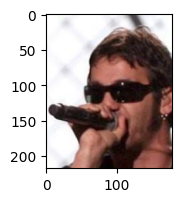

1
../raw_data/img_align_celeba/021025.jpg


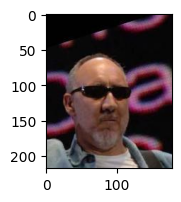

2
../raw_data/img_align_celeba/123439.jpg


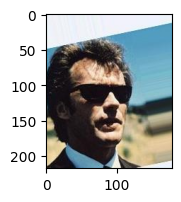

3
../raw_data/img_align_celeba/120638.jpg


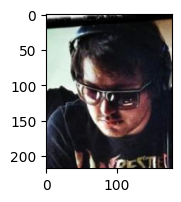

4
../raw_data/img_align_celeba/051005.jpg


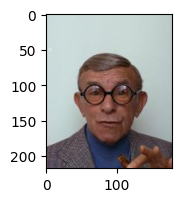

In [90]:
import matplotlib.pyplot as plt

path = "../raw_data/img_align_celeba/"

for i in range(5):
    print(i)
    img_filename = df.iloc[index_highsimilarity[i]].image_id
    filename = path + img_filename
    print(filename)
#    open_image(path,img_filename)
    img = Image.open(filename)
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.show()